# Ejercicio Práctico de Koalas

In [1]:
import findspark
findspark.init()

import pandas as pd
import pyspark

In [2]:
import numpy as np
import pandas as pd
import databricks.koalas as ks

### Funciones básicas

In [3]:
pser = pd.Series([1, 3, 5, np.nan, 6, 8]) 

## Crea una serie de Koalas con [1, 3, 5, np.nan, 6, 8]

kser = ks.Series(pser)

## Pasa la serie de pandas pser a Koalas con el nombre de kser

In [4]:
## Ordena kser por el index

kser.sort_index(ascending=False)

5    8.0
4    6.0
3    NaN
2    5.0
1    3.0
0    1.0
dtype: float64

In [7]:
pdf = pd.DataFrame({'A': np.random.rand(5),
                    'B': np.random.rand(5)})

## Genera un Dataframe de Koalas con el pdf de pandas y llamalo kdf

In [8]:
kdf = ks.from_pandas(pdf)

### Visualización de datos

In [11]:
## Describe los datos de kdf
kdf.describe()

,A,B
count,5.000000,5.000000
mean,0.511166,0.589796
std,0.314072,0.237368
min,0.275212,0.315609
25%,0.288081,0.426631
50%,0.298969,0.542868
75%,0.749787,0.786610
max,0.943781,0.877261


In [12]:
## Ordena los datos de kdf por la columna B
kdf.sort_values(by='B')

,A,B
0,0.749787,0.315609
4,0.943781,0.426631
1,0.275212,0.542868
3,0.288081,0.786610
2,0.298969,0.877261


In [13]:
## Transpon los datos de kdf
kdf.T

,0,1,2,3,4
A,0.749787,0.275212,0.298969,0.288081,0.943781
B,0.315609,0.542868,0.877261,0.786610,0.426631


### Selección

In [33]:
## Selecciona las variables A y B de Kdf
kdf.loc[['A','B']]

,A,B


In [16]:
## Selecciona las filas 1, 2 de kdf
kdf.iloc[1:3]

,A,B
1,0.275212,0.542868
2,0.298969,0.877261


In [24]:
## Selecciona las filas 0, 1 y 2 de la variable B
kdf.iloc[0:3]['B']

0    0.315609
1    0.542868
2    0.877261
Name: B, dtype: float64

### Aplicando funciones de Python a Koalas

In [35]:
## Aplica la funcion de Python de np.cumsum a kdf
kdf_cumsum = kdf.apply(lambda col: col.cumsum() if np.issubdtype(col.dtype, np.number) else col)
kdf_cumsum

,A,B
0,0.749787,0.315609
1,1.024999,0.858478
2,1.323968,1.735738
3,1.612049,2.522348
4,2.555831,2.948979


In [36]:
## Eleva al cuadrado los valores de kdf
kdf_cuadrado = kdf.applymap(lambda x: x**2)
kdf_cuadrado

,A,B
0,0.562180,0.099609
1,0.075742,0.294706
2,0.089383,0.769586
3,0.082991,0.618755
4,0.890723,0.182014


### Agrupando datos

In [14]:
## Obten la suma de los valores al agrupar por A y por B
kdf.groupby(['A', 'B']).sum()

,
A,B
0.288081,0.786610
0.275212,0.542868
0.943781,0.426631
0.298969,0.877261
0.749787,0.315609


### Generando gráficos

In [37]:
# This is needed for visualizing plot on notebook
%matplotlib inline

<AxesSubplot:>

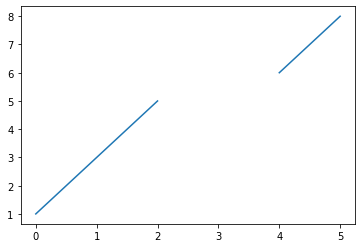

In [40]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']

kdf = ks.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)

## Genera un grafico de barras con kdf y matplotlib

ks.options.plotting.backend = "matplotlib"

kser.plot()

In [41]:
kdf = ks.DataFrame({
    'sales': [3, 2, 3, 9, 10, 6, 3],
    'signups': [5, 5, 6, 12, 14, 13, 9],
    'visits': [20, 42, 28, 62, 81, 50, 90],
}, index=pd.date_range(start='2019/08/15', end='2020/03/09',
                       freq='M'))

## Genera un grafico de areas con kdf y matplotlib

ks.options.plotting.backend = "pandas_bokeh"

kdf.plot(backend="pandas_bokeh", title="Example Figure")
kser.plot()

Figure(id='1388', ...)

### Utilizando SQL en Koalas

In [68]:
from pyspark.sql import SparkSession

In [110]:
kdf = ks.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                    'pig': [20, 18, 489, 675, 1776],
                    'horse': [4, 25, 281, 600, 1900]})

In [46]:
import pandas as pd

In [55]:
## Con una consulta SQL selecciona los datos donde pig sea mayor que 100
df = kdf.to_pandas()

In [74]:
result = kdf.query('pig > 100')
print(result)

AnalysisException: "cannot resolve '`pig`' given input columns: [__index_level_0__, A, B]; line 1 pos 0;\n'Filter ('pig > 100)\n+- Project [__index_level_0__#1211L, A#1212L AS A#1238L, B#1213L AS B#1239L]\n   +- Project [__index_level_0__#1211L, A#1212L, B#1213L, monotonically_increasing_id() AS __natural_order__#1217L]\n      +- LogicalRDD [__index_level_0__#1211L, A#1212L, B#1213L], false\n"

In [48]:
pdf = pd.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                    'sheep': [22, 50, 121, 445, 791],
                    'chicken': [250, 326, 589, 1241, 2118]})

In [75]:
## Haz un inner join entre kdf y pdf en la vriable year, selecciona el pig y el chicken
## ordena los datos por pig y chicken
kdf_pdf = ks.DataFrame(pdf)

In [76]:
joined = kdf.merge(kdf_pdf, on='year')

KeyError: 'year'

In [77]:
selected_columns = joined[['pig', 'chicken']]

NameError: name 'joined' is not defined

In [78]:
sorted_data = selected_columns.sort_values(by=['pig', 'chicken'])

NameError: name 'selected_columns' is not defined

### Trabajando con PySpark

In [63]:
kdf = ks.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [10, 20, 30, 40, 50]})

## Convierete el dataframe de Koalas a Dataframe de Spark
type(kdf)

databricks.koalas.frame.DataFrame

In [65]:
import databricks.koalas as ks
from pyspark.sql import SparkSession

In [66]:
spark = SparkSession.builder.getOrCreate()
df_spark = kdf.to_spark()

In [67]:
## muestra los datos
df_spark.show()

+---+---+
|  A|  B|
+---+---+
|  1| 10|
|  2| 20|
|  3| 30|
|  4| 40|
|  5| 50|
+---+---+

